In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import decimal

In [2]:
output_interval = 0.01
file_num = int(10/output_interval+1)
sample_profile = np.loadtxt('./slices/slice-0', usecols = (1, 4), skiprows=1, dtype=np.float32)
xCoord = sample_profile[:, 0]
ele_num = np.size(sample_profile[:, 0])
sol_comb = np.zeros((ele_num, file_num))
f1 = ' '
end_time = 10.0

n_val = 0.4
beta = 2.0*(2.0*n_val+1.0)/(2.0+3.0*n_val)
grav = 9.81
nd = 0.002099551886
nv = 0.1433858
slope = 0.06

for i in range(0, file_num):
    f1 = float("{:3.10f}".format(i*output_interval))
#     f1 = np.format_float_positional((i*output_interval), trim='-')
    if f1 < end_time:
        time_norm = decimal.Decimal(str(f1)).normalize()
    else:
        time_norm = int(f1)
    time_normStr = str(time_norm)
    print(time_normStr)
    sample_profile = np.loadtxt('./slices/slice-'+time_normStr, usecols = (4), skiprows=1, dtype=np.float32)
    sol_comb[:, i] = sample_profile

0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.38
1.39
1.4
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1.58
1.59
1.6
1.61
1.62
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.72
1.73
1.74
1.75
1.76
1.77
1.78
1.79
1.8
1.81
1.82
1.83
1.84
1.85
1.86
1.87
1.88
1.89
1.9
1.91
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2
2.01
2.02
2.03
2.04
2.

In [3]:
# normalization
sol_comb_norm = sol_comb/nd
xCoord_norm = xCoord/(nv**2.0/(grav*slope))
lx_norm = np.max(xCoord_norm)
xb_norm = 50.0
xCenter_norm = 50+75.0*nd/2.0/(nv**2.0/(grav*slope))
width_norm = 75*nd/(nv**2.0/(grav*slope))

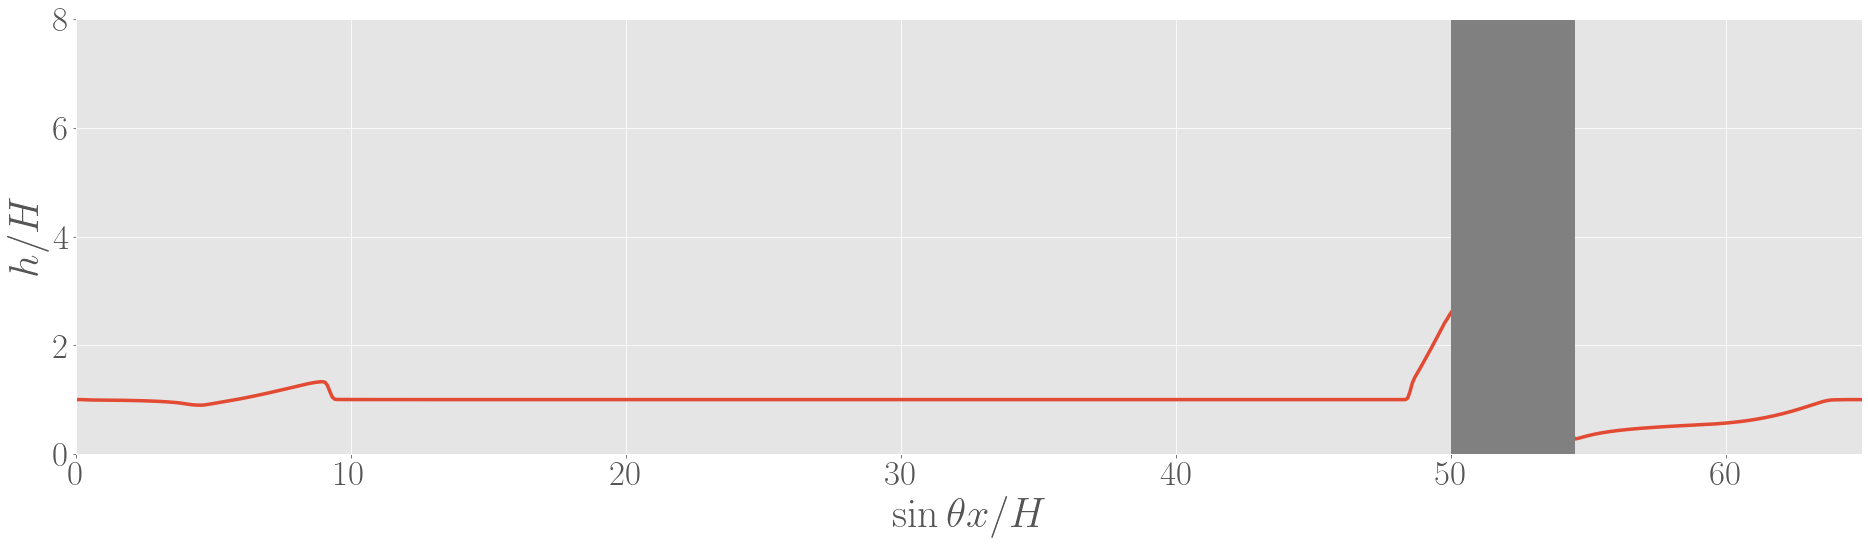

In [15]:
# a static plot for centerline profile
fig, ax = plt.subplots()
plt.style.use('ggplot')
# plt.style.use('seaborn')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=35)
ax.tick_params(axis='both', which='minor', labelsize=35)
plt.rcParams['figure.figsize'] = [32.00, 8.0]
# plt.rc('axes', labelsize=32) 
plt.xlim([0, lx_norm])
plt.ylim([0, 8])
plt.xticks(np.arange(0.0, (60.0+10), 10))
plt.yticks(np.arange(0.0, (8.0+2), 2))
plt.xlabel(r'$\sin\theta x/H$', fontsize = 42)
plt.ylabel(r'$h/H$', fontsize = 42)
# time_str = str(float("{:.2f}".format(0.3214612)))
# plt.title('$t='+time_str+'$'+' '+'$\mathrm{s}$', fontsize=22.5)
plt.plot(xCoord_norm, sol_comb_norm[:, 100], linewidth=3.5)
rect = plt.Rectangle((xb_norm, 0.0), width_norm, 8.0, facecolor='gray', fill=True, zorder=2)
ax.add_patch(rect)

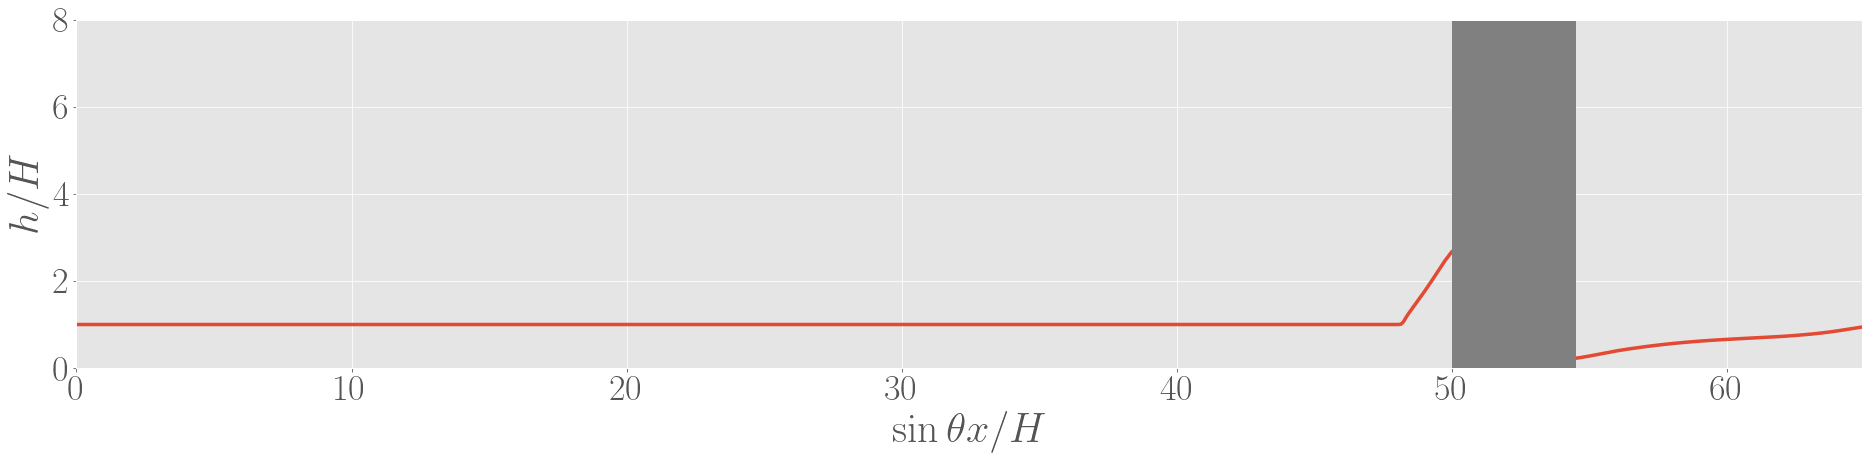

In [17]:
# dynamic CD plot
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.rcParams['figure.figsize'] = [32.00, 8.0]
plt.xlim([0, lx_norm])
plt.ylim([0, 8])
plt.xticks(np.arange(0.0, (60.0+10), 10))
plt.yticks(np.arange(0.0, (8.0+2), 2))
plt.xlabel(r'$\sin\theta x/H$', fontsize = 42)
plt.ylabel(r'$h/H$', fontsize = 42)
plt.subplots_adjust(bottom=0.275)
# time_str = str(float("{:.2f}".format(0.0)))
# plt.title('$t='+time_str+'$'+' '+'$\mathrm{s}$', fontsize=22.5)
line, = ax.plot([], [], linewidth=3.5)
rect = plt.Rectangle((xb_norm, 0.0), width_norm, 8.0, facecolor='gray', fill=True, zorder=2)
ax.add_patch(rect)
def update(num, xCoord_norm, sol_comb_norm, line):
    plt.style.use('ggplot')
    plt.rc('text', usetex=True)
    ax.tick_params(axis='both', which='major', labelsize=36)
    ax.tick_params(axis='both', which='minor', labelsize=36)
    plt.rcParams['figure.figsize'] = [32.00, 8.0]
    plt.xlim([0, lx_norm])
    plt.ylim([0, 8])
    plt.xticks(np.arange(0.0, (60.0+10), 10))
    plt.xlabel(r'$\sin\theta x/H$', fontsize = 42)
    plt.ylabel(r'$h/H$', fontsize = 42)
    plt.subplots_adjust(bottom=0.275)
    line.set_data(xCoord_norm, sol_comb_norm[:, num])
    rect = plt.Rectangle((xb_norm, 0.0), width_norm, 8.0, facecolor='gray', fill=True, zorder=2)
    ax.add_patch(rect)
    return line,

ani = animation.FuncAnimation(fig, update, file_num, fargs=[xCoord_norm, sol_comb_norm, line],
                              interval=6.0, blit=True)
ani.save('cir_profiles_anim.mp4', dpi = 100)
plt.show()